In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data['free sulfur dioxide'] = data['free sulfur dioxide'].astype('int32')
data['total sulfur dioxide'] = data['total sulfur dioxide'].astype('int32')
data['quality'] = data['quality'].astype('int32')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int32  
 6   total sulfur dioxide  1599 non-null   int32  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int32  
dtypes: float64(9), int32(3)
memory usage: 131.3 KB


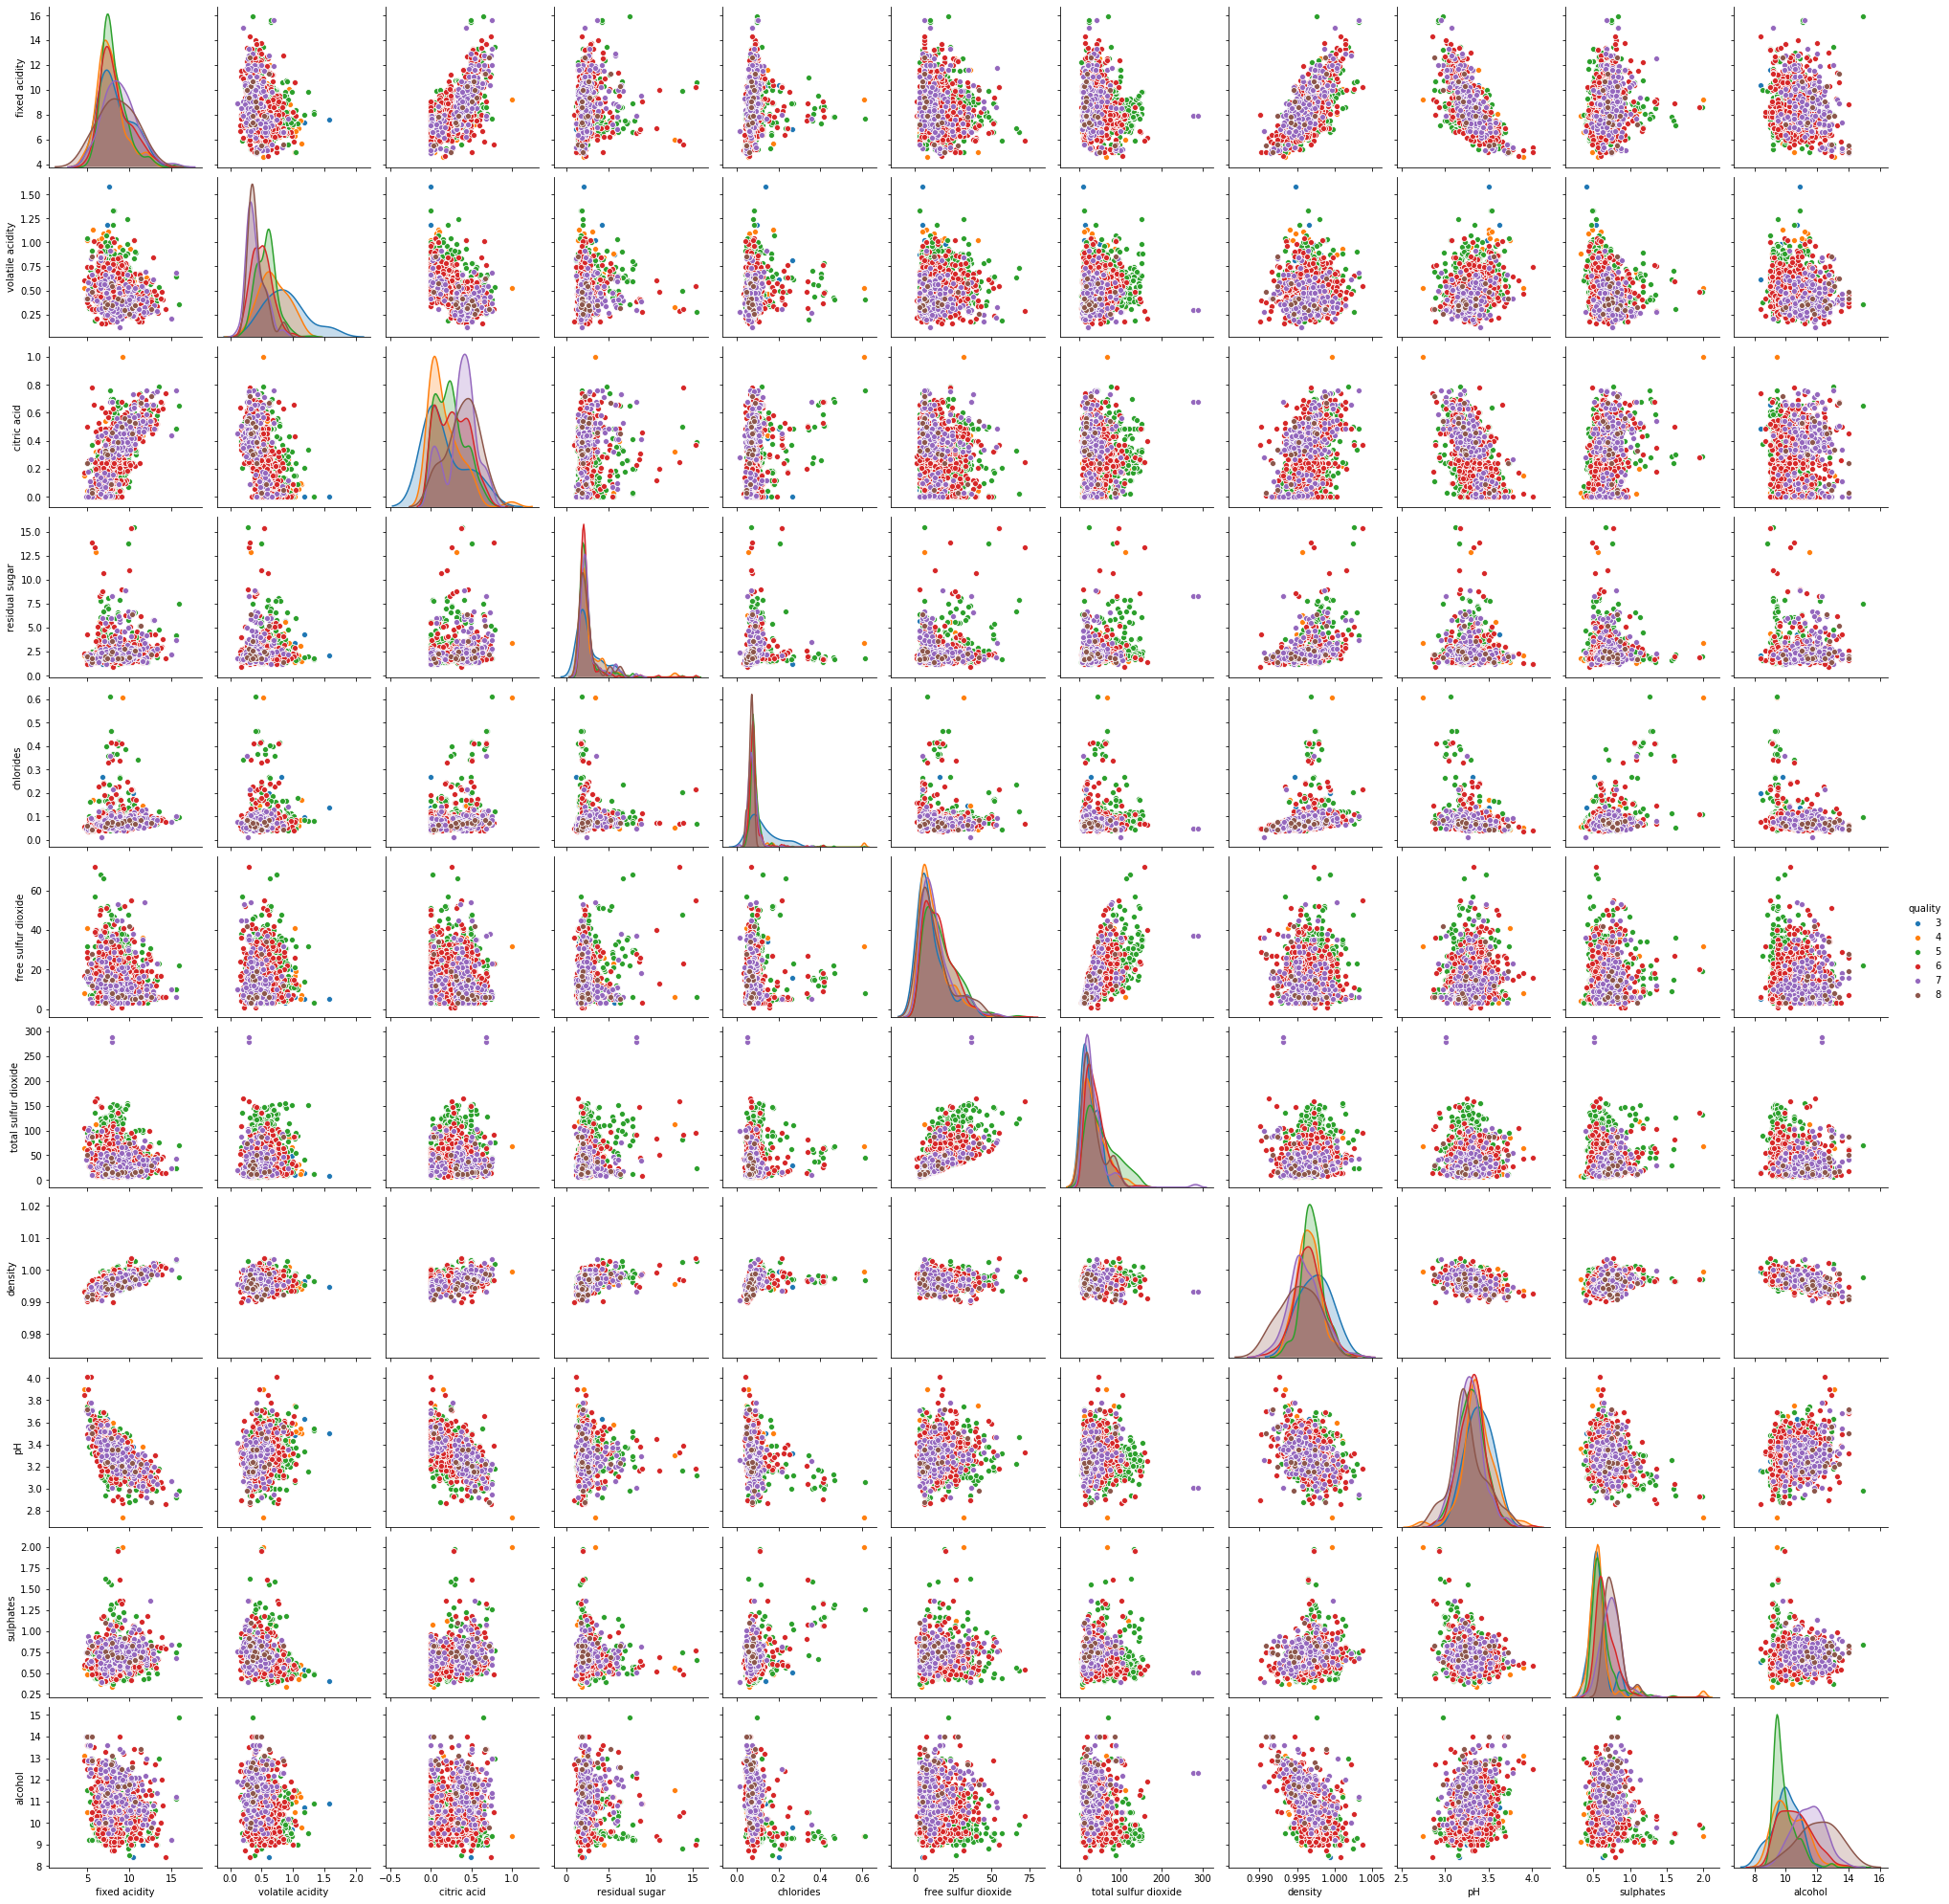

In [10]:
sns.pairplot(data,hue='quality')

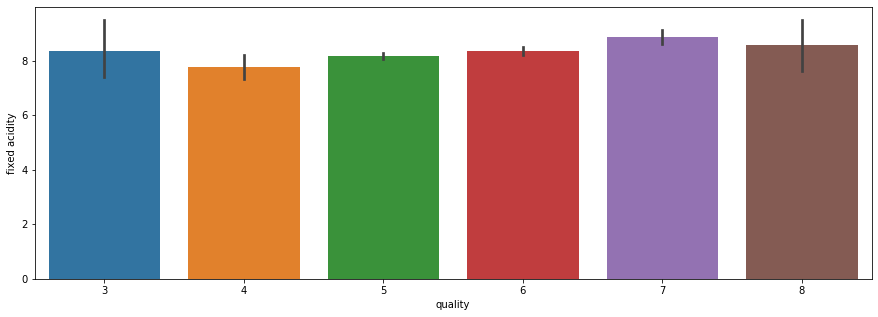

In [8]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x='quality',y='fixed acidity',data=data)

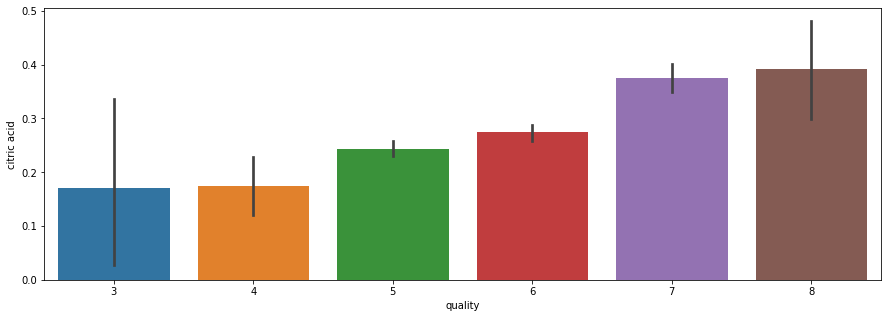

In [9]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

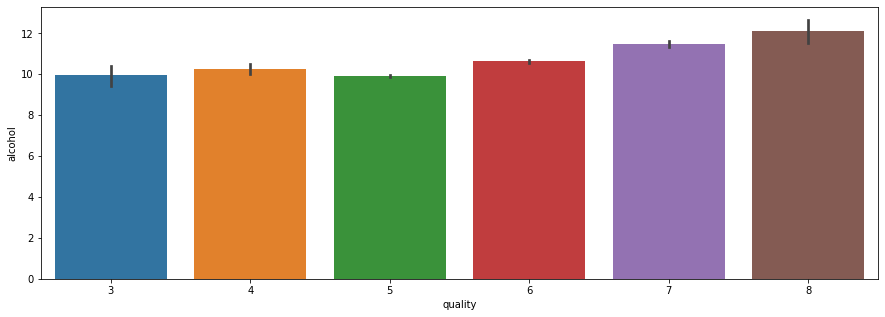

In [10]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

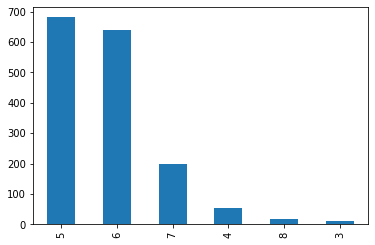

In [11]:
data['quality'].value_counts().plot.bar()

In [12]:
data['quality'] = data['quality'].apply(lambda x: 1 if x > 6 else 0)

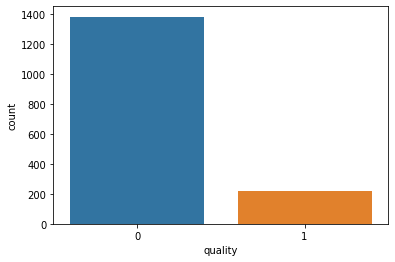

In [13]:
sns.countplot(data['quality'])

In [14]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
y = data['quality']
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=43)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(1279, 11) (1279,)
(320, 11) (320,)


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
classifier = DecisionTreeClassifier(max_depth=4,min_samples_split=0.2,min_samples_leaf=0.1,max_features=2)
classifier = classifier.fit(X_train,y_train)

In [33]:
y_predicted = classifier.predict(X_test)

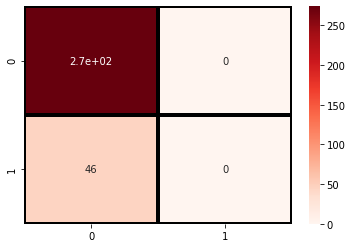

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_predicted),cmap="Reds",annot=True,linewidths=3,linecolor='black')

In [35]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       274
           1       0.00      0.00      0.00        46

    accuracy                           0.86       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.86      0.79       320



C:\Bin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
metrics.accuracy_score(y_test, y_predicted)

0.85625

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 0.14375
Mean Squared Error: 0.14375
Root Mean Squared Error: 0.3791437722025775


In [23]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8004601713741668

In [24]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)

   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    
   test_results.append(roc_auc)

Text(0.5, 0, 'Tree depth')

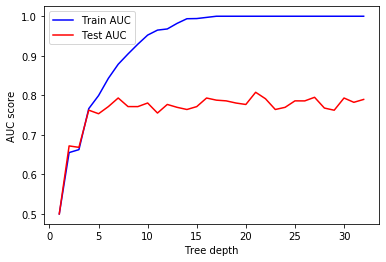

In [25]:
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('Tree depth')

In [26]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train,y_train)
    train_pred = dt.predict(X_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_train,train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr)
    test_results.append(roc_auc)

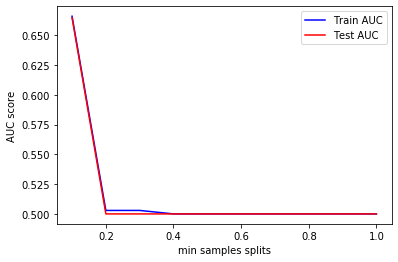

In [27]:
plt.plot(min_samples_splits, train_results,'b',label = "Train AUC")
plt.plot(min_samples_splits, test_results,'r',label = "Test AUC")
plt.xlabel('min samples splits')  
plt.ylabel('AUC score')
plt.legend()

In [28]:
min_samples_leafs = np.linspace(0.1, 0.5, 5)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train,y_train)
    train_pred = dt.predict(X_train)
    fpt, tpr, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(fpt,tpr)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr)
    test_results.append(roc_auc)

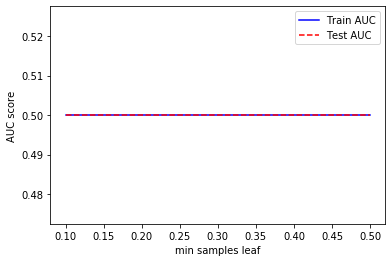

In [29]:
min_samples_leafs = np.array(min_samples_leafs)
train_results = np.array(train_results)
test_results = np.array(test_results)
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r--', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.legend()

In [30]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_train,y_train)
    train_pred = dt.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(fpr,tpr)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr)
    test_results.append(roc_auc)

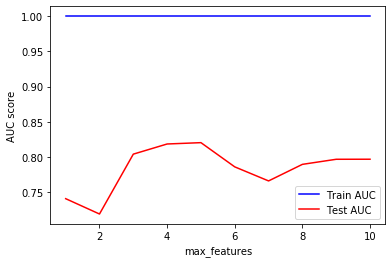

In [31]:
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.legend()